<a href="https://colab.research.google.com/github/enikolaev/AI_and_ML/blob/main/LabWork_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Управление количественными данными

Подключение библиотеки

In [1]:
import pandas as pd
import numpy as np

## Масштабирование признака

Для масштабирования признака будем использовать MinMaxScaler библиотеки scikit-learn

In [2]:
from sklearn import preprocessing
# Сгенерируем признак, который имеет существенный разброс
feature = np.array([1.0, 100.23, 1.23, 12, 56, -111.23, 56.045, 0.234, -0.0112, 415.0])
# Изменение размерности
feature = np.reshape(feature, (feature.shape[0],1))

# Создание объекта-исполнителя масштабирования
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# Непосредственно получение масштабированного признака
scaled_feature = minmax_scaler.fit_transform(feature)

scaled_feature

array([[0.21327176],
       [0.4018395 ],
       [0.21370883],
       [0.23417517],
       [0.3177888 ],
       [0.        ],
       [0.31787431],
       [0.21181613],
       [0.21135017],
       [1.        ]])

## Стандартизация признака

In [3]:
from sklearn import preprocessing
# Сгенерируем признак, который имеет существенный разброс
feature = np.array([1.0, 100.23, 1.23, -111.23, -0.0112, 415.0])
# Изменение размерности
feature = np.reshape(feature, (feature.shape[0],1))

# Создание объекта-исполнителя стандартизации
scaler = preprocessing.StandardScaler()

# Непосредственно получение стандартизированного признака
standartized = scaler.fit_transform(feature)

standartized

array([[-0.39964764],
       [ 0.19488268],
       [-0.39826961],
       [-1.07206665],
       [-0.40570618],
       [ 2.0808074 ]])

## Нормализация наблюдаемых данных

In [4]:
from sklearn.preprocessing import Normalizer
# Создаем матрицу признаков
feature = np.array([[0.5, 1.0],
                    [1.5, 1.0],
                    [34.005, 13.98],
                    [3.11, -12.405],
                    [30.54, 71.0771],
                    [0.92, 9.045]])
# Создание нормалайзера
norm = Normalizer(norm="l2")

# Получение нормализованной матрицы
norm_feature = norm.transform(feature)

norm_feature

array([[ 0.4472136 ,  0.89442719],
       [ 0.83205029,  0.5547002 ],
       [ 0.92488919,  0.38023675],
       [ 0.24317951, -0.9699813 ],
       [ 0.39477515,  0.91877776],
       [ 0.10119155,  0.99486696]])

## Генерирование полиномиальных и взаимодействующих признаков

In [5]:
from sklearn.preprocessing import PolynomialFeatures
# Создаем матрицу признаков
feature = np.array([[2, 1],
                    [3, 4],
                    [0, 7],
                    [11, 5]])
# Создание объекта PolynomialFeatures
poly = PolynomialFeatures(degree=2)

# Создание полиномиальных признаков
poly_feature = poly.fit_transform(feature)

poly_feature

array([[  1.,   2.,   1.,   4.,   2.,   1.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   0.,   7.,   0.,   0.,  49.],
       [  1.,  11.,   5., 121.,  55.,  25.]])

## Преобразование признаков

In [6]:
from sklearn.preprocessing import FunctionTransformer
# Создаем матрицу признаков
feature = np.array([[2, 1],
                    [3, 4],
                    [0, 7],
                    [11, 5]])

# Требуемое нестандартное преобразование реализуем в виде пользовательской функции
def User_Operation(x):
  return x*x

# Создаем преобразователь
user_transformer = FunctionTransformer(User_Operation)

# Выполнение преобрпазования
new_feature = user_transformer.fit_transform( feature )
new_feature

array([[  4,   1],
       [  9,  16],
       [  0,  49],
       [121,  25]])

## Обнаружение выбросов

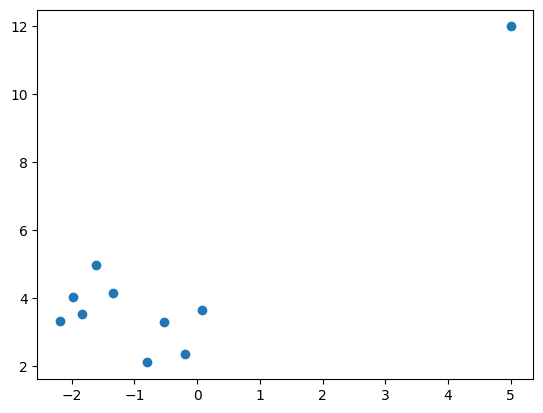

In [7]:
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# Создаем облако точек
features, _ = make_blobs(n_samples=10,
                         n_features=2,
                         centers=1,
                         random_state=1)

# Создадим выбросы
features[1, 0] = 5
features[1, 1] = 12

# Выполним визуализацию выбросов
plt.scatter(features[:,0].reshape(10,1),
            features[:,1].reshape(10,1))

In [8]:
# Создадим детектор выбросов
detector = EllipticEnvelope(contamination=0.1)
# Обучение детектора
detector.fit(features)

# Предсказание выбросов
detector.predict(features)

array([ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1])

## Управление выбросами

In [9]:
# Создание простого набора данных для описания объектов недвижимости
data = pd.DataFrame()
data['Цена'] = [3_900_000, 5_400_000, 3_000_000, 120_000_000]
data['Площадь'] = [42.5, 65.9, 35.1, 250.2]
data['Комнаты'] = [1, 2, 1, 25]
data

,Цена,Площадь,Комнаты
0,3900000,42.5,1
1,5400000,65.9,2
2,3000000,35.1,1
3,120000000,250.2,25


Способ 1. Выполним фильтрацию данных, удалив явно лишний объект недвижимости с большой площадью

In [10]:
data[data['Площадь'] < 110.0]

,Цена,Площадь,Комнаты
0,3900000,42.5,1
1,5400000,65.9,2
2,3000000,35.1,1


Способ 2. Добавим новый столбец и пометим выбросы

In [11]:
data['Выбросы'] = np.where(data['Площадь'] < 110, 0, 1)
data

,Цена,Площадь,Комнаты,Выбросы
0,3900000,42.5,1,0
1,5400000,65.9,2,0
2,3000000,35.1,1,0
3,120000000,250.2,25,1


Способ 3. Преобразование "выпирающего" признака для сглаживания его влияния (например логарифмирование)

In [12]:
data['Log_Площадь'] = [np.log(x) for x in data['Площадь']]
data

,Цена,Площадь,Комнаты,Выбросы,Log_Площадь
0,3900000,42.5,1,0,3.749504
1,5400000,65.9,2,0,4.188138
2,3000000,35.1,1,0,3.558201
3,120000000,250.2,25,1,5.522261


## Дискретизация признаков

Способ 1. Бинаризация (разделение относительно порогового значения)

In [13]:
from sklearn.preprocessing import Binarizer

age = np.array([12,15,18,24,25,45,30,34])
N = age.shape[0]
age=age.reshape(N,1)

# Определение объекта для бинаризации
binarizer = Binarizer(threshold=18)

binarizer.fit_transform(age).reshape(N)

array([0, 0, 0, 1, 1, 1, 1, 1])

Способ 2. Использование нескольких пороговых значений

In [14]:
np.digitize(age, bins=[18, 30, 50]).reshape(N)

array([0, 0, 1, 1, 1, 2, 2, 2])

## Группировка наблюдений при помощи кластеризации

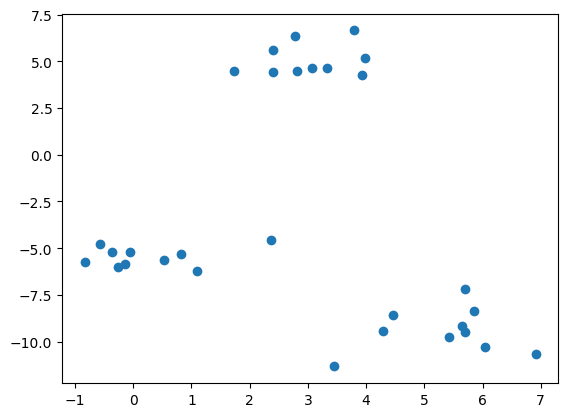

In [16]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# Создаем несколько групп объектов с двумя признаками
N = 30
data, _ = make_blobs(n_samples=N,
                         n_features=2,
                         centers=3,
                         random_state=10)


# Выполним визуализацию набора данных
plt.scatter(data[:,0].reshape(N,1),
            data[:,1].reshape(N,1))

Выполним кластеризацию

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


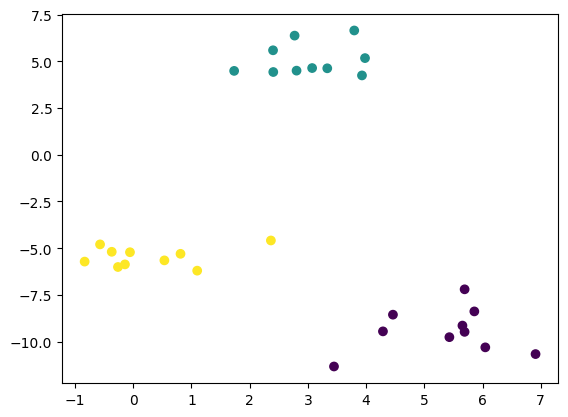

In [25]:
from sklearn.cluster import KMeans

# Создание DataFrame
datafr = pd.DataFrame(data, columns=["X", "Y"])

# Создание механизма кластеризации
clusterer = KMeans(3, random_state=1)

# Настройка кластеризации
clusterer.fit(datafr)

# Предсказание значений кластера
datafr["group"] = clusterer.predict(data)
plt.scatter(datafr["X"], datafr["Y"], c=datafr["group"])

## Удаление элементов с отсутствующим значением

In [33]:
features = np.array([[0.5, 1.0],
                    [1.5, 1.0],
                    [34.005, 13.98],
                    [3.11, np.nan],
                    [30.54, 71.0771],
                    [np.nan, 9.045]])

# Нахождение объектов с NaN-признаками
print(features[np.isnan(features).any(axis=1)])

# Удаление объектов из выборки
features = features[~np.isnan(features).any(axis=1)]
print(features)

[[3.11    nan]
 [  nan 9.045]]
[[ 0.5     1.    ]
 [ 1.5     1.    ]
 [34.005  13.98  ]
 [30.54   71.0771]]


Изучите представленные алгоритмы работы с числовыми признаками. Самостоятельно реализуйте все представленные алгоритмы на собственном наборе данных